# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
#soup.find('main') 
#metdata of interest: <table class="table"> or 'tbody'
all_table = soup.find('table', class_='table') 
#all_table = soup.find('tbody') 
print(all_table)
#print(all_table.text) 
#Note: metadata is table headers in group, then in groups the respective values for each row

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [29]:
#METHOD 1: LIST OF LISTS - get all column data into list then seperate into chunks
headers_list = []
#only header names
headers_sect = all_table.find_all('th')
# print(headers_sect)
for row in headers_sect:
    header = row.text.strip()
    headers_list.append(header)  # Append the text of the header
# print(headers_list)

# #columns data
# data = soup.find_all("tr", class_="data-row")
# dataList_unorg = []  # Initialize an empty list to store the data

# for row in data:  # Iterate over each row found
#     data_chunk = row.find_all('td')  # Find all <td> elements in the current row
#     for cell in data_chunk: # Iterate over each cell in the row
#         dataList_unorg.append(cell.text)  # Append the text of each cell to the list
#         #put into list of rows - chunks of 7 (per id)
#         data_list = [dataList_unorg[i:i + 7] for i in range(0, len(dataList_unorg), 7)]
#print(data_list)  # Print the list of lists
#for indeces: 0 is 1st row, 1 is 2nd row, etc.

#ALTERNATIVE: LIST OF LISTS - use indeces to store into lists for column headers
table_body = all_table.find('tbody')
rows = table_body.find_all('tr', class_="data-row")
#rows = soup.find("table", class_='table').find("tbody").find_all("tr", class_="data-row")

empty_list = []
for row in rows:
    cells = row.find_all("td")  # Find all <td> elements in the current row
    if cells:  # Check if there are any <td> elements
        #for cell indeces: 0=id, 1=t_date, 2=sol, 3=ls, 4=month, 5=min_temp, 6=pressure
        id = cells[0].get_text()  # Get the text of the first <td> element
        terrestrial_date = cells[1].get_text()
        sol = cells[2].get_text()
        ls = cells[3].get_text()
        month = cells[4].get_text()
        min_temp = cells[5].get_text()
        pressure = cells[6].get_text()
        empty_list.append(id)
        empty_list.append(terrestrial_date)
        empty_list.append(sol)
        empty_list.append(ls)
        empty_list.append(month)
        empty_list.append(min_temp)
        empty_list.append(pressure)
        #still need to split into chunks of 7, but it is at least labelled by column header
        data_list = [empty_list[i:i + 7] for i in range(0, len(empty_list), 7)]
# print(empty_list)
print(data_list)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '

In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_list, columns=headers_list)

In [33]:
# Confirm DataFrame was created successfully
mars_df.head()

id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [39]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [41]:
# Change data types for data analysis
# mars_df['id'] = mars_df['id'].astype(object)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [42]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [46]:
# 1. How many months are there on Mars?
monthCount = mars_df['month'].nunique()
print(monthCount)

12


In [52]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = len(mars_df['sol'])
print(total_sols)


1867


In [53]:
# 3. What is the average minimum temperature by month?
#get each month and sort in ascending
months = mars_df['month'].unique()
sortedmonths = sorted(months)
# print(months)
# print(sortedmonths)

#get avg in temp per month
#group by month and avg
avg_minTperMonth = mars_df.groupby('month')['min_temp'].mean()
#change index to sorted
SORTEDavg_minTperMonth = avg_minTperMonth.reindex(sortedmonths)
print(SORTEDavg_minTperMonth)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


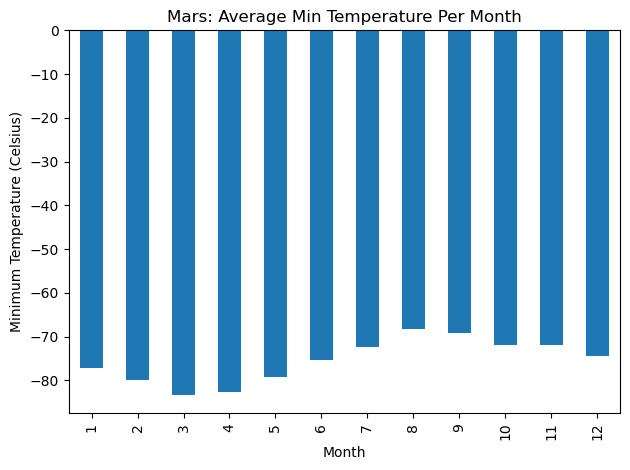

In [56]:
# Plot the average minimum temperature by month
# Create a bar chart
SORTEDavg_minTperMonth.plot(kind='bar')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Mars: Average Min Temperature Per Month')

# Show the plot
plt.tight_layout()
plt.show()

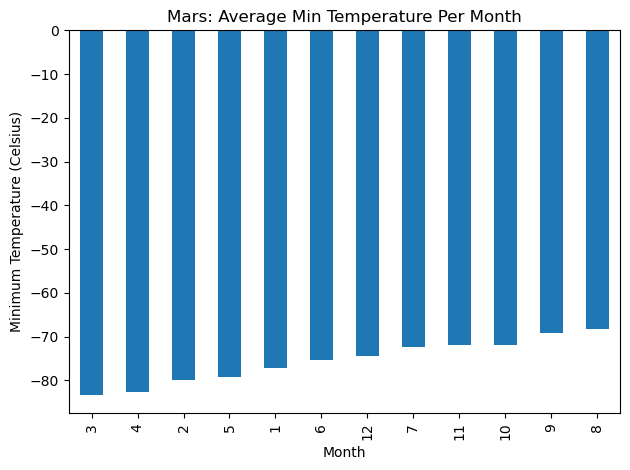

In [92]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
#sort by temp the sorted avgmintemp obj
sortedTempbyMonth = avg_minTperMonth.sort_values(ascending=True)
# print(sortedTempbyMonth)

#plot
sortedTempbyMonth.plot(kind='bar')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Mars: Average Min Temperature Per Month')

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
# 4. What is the average pressure by month?
#group by month and avg P
avg_PperMonth = mars_df.groupby('month')['pressure'].mean()
#change index to sorted
SORTEDavg_PperMonth = avg_PperMonth.reindex(sortedmonths)
print(SORTEDavg_PperMonth)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


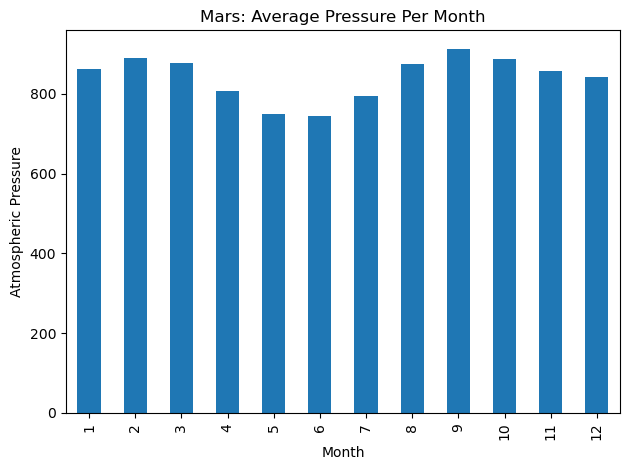

In [68]:
# Plot the average pressure by month
#plot
SORTEDavg_PperMonth.plot(kind='bar')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Mars: Average Pressure Per Month')

# Show the plot
plt.tight_layout()
plt.show()

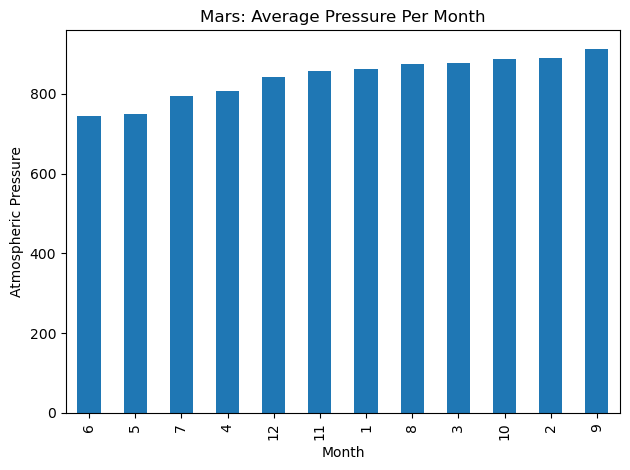

In [94]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
AscPressurebyMonth = SORTEDavg_PperMonth.sort_values(ascending=True)
# print(AscPressurebyMonth)
#plot
AscPressurebyMonth.plot(kind='bar')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Mars: Average Pressure Per Month')

# Show the plot
plt.tight_layout()
plt.show()

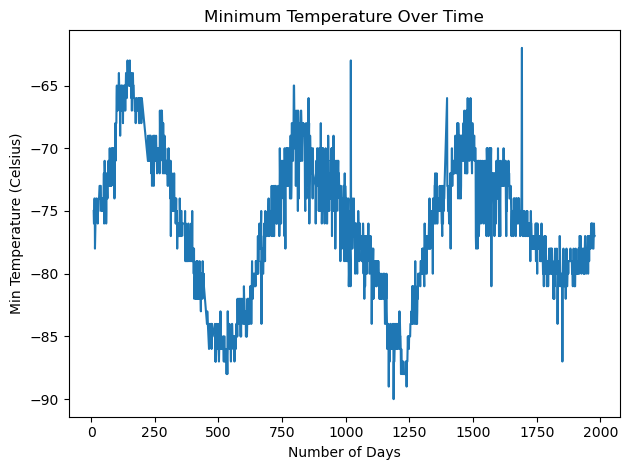

In [90]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
#Consider how many days elapse on Earth in the time that Mars circles the Sun once (a martian year).
Earthsol = mars_df.groupby(by=["terrestrial_date", "sol"])
# Earthsol.head() #it seems each time an earth day goes up by 1, the mars sol goes up by 1; so either 1:1 or similar
total_Tdays = len(mars_df['terrestrial_date']) #should be same as total_sol; how many earthdays in the df
# print(total_Tdays)

# 687 Earth days – or one Mars year
# (https://www.jpl.nasa.gov/edu/learn/video/mars-in-a-minute-how-long-is-a-year-on-mars/#:~:text=Video%20Transcript,year%20means%20longer%20seasons%20too.)

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
#can show seasons visually via low and high min-Temps (similar dips could be a return to that season/a year)
#plot x=total_t-days OR total_sol, y= min-temp (temp corresp to each day count)
plt.plot(mars_df['sol'], mars_df['min_temp']) # ,marker='o'
plt.xlabel('Number of Days')
plt.ylabel('Min Temperature (Celsius)')
plt.title('Minimum Temperature Over Time')
plt.tight_layout()
plt.show()



#### Minimum Temperature

The highest (warmest) average min temp in Mars recorded in our data set is about -83 degrees celsius and the lowest (coldest) average minimum temp is around -68 degrees celsius.  -74.451807

#### Atmospheric Pressure

The highest atmospheric pressure for Mars in our dataset is around 913 units and the lowest is about 745 units. 913.305970

#### Year Length

A year on Mars is more than 500 earth days (but less than 750 earth days) according to our estimate based on patterns in the minimum temperatures recorded in our dataset. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [96]:
# Write the data to a CSV
#make sure you create file called mars_weather.csv to hold the output
mars_df.to_csv("mars_weather.csv", encoding="utf-8", index=False, header=True)


In [97]:
browser.quit()